Import Everything

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import cv2

Read Image

In [3]:
image = cv2.imread('Lena.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Defining Kernel and Convolve function

In [4]:
kernel = np.array(
    [[0, -1, 0],
     [-1, 4, -1],
     [0, -1, 0]]
)
gaussian_kernel = np.array([
    [0,  1,  2,  1, 0],
    [1, 3, 5, 3, 1],
    [2, 5, 9, 5, 2],
    [1, 3, 5, 3, 1],
    [0, 1, 2, 1, 0]
], dtype=np.float32)
def convolve(image : np.array ,  kernel : np.array) -> np.array:
    kernel = np.flip(kernel)
    ih, iw = image.shape
    kh , kw = kernel.shape
    border_size = kh//2
    img_bordered = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT)
    bh,bw = img_bordered.shape
    result = np.zeros((ih, iw), dtype=np.float32)
    for i in range(ih):
        for j in range(iw):
            region = img_bordered[i:i+kh ,j:j+kw]
            mul = np.multiply(region,kernel)
            val = np.sum(mul)
            result[i,j] = val 
            # rh , rw = region.shape 
            # sum = 0 
            # for k in range(rh):
            #     for l in range(rw):
            #         mul = region[k,l] * kernel[k,l]
            #         sum = sum + mul
            # result[i,j] = sum 
    return result 


Gaussian Smoothing Filter and Sharpenning Filter

In [5]:
def Gaussian_Smoothing_Function(u,v,sigma):
    return (1/(2*np.pi*sigma**2))*np.exp(-(u**2 + v**2) /(sigma**2))

def Gaussian_Sharp_Function(u,v,sigma):
    return (((u**2 + v**2  - 2 * sigma**2)/sigma**4) * np.exp(-(u**2+v**2)/(2*sigma**2)))

def Gaussian_Smoothing_kernel(size , sigma):
    k = size // 2
    kernel = np.zeros((size,size ) , dtype=np.float32)
    for i in range(size):
        for j in range(size):
            u = i - k
            v = j - k 
            kernel[i,j] = Gaussian_Smoothing_Function(u,v,sigma)
    kernel /= np.sum(kernel)
    return kernel 
def Gaussian_Sharpenning_kernel(size , sigma):
    k = size // 2
    kernel = np.zeros((size,size ) , dtype=np.float32)
    for i in range(size):
        for j in range(size):
            u = i - k
            v = j - k 
            kernel[i,j] = Gaussian_Sharp_Function(u,v,sigma)
    kernel /= np.sum(kernel)
    return kernel 


Create Kernels

In [12]:
smoothing_kernel = Gaussian_Smoothing_kernel(5, 1)
sharpening_kernel = Gaussian_Sharpenning_kernel(7, 1)
print("Smoothing Kernel:\n", smoothing_kernel)
print("Sharpening Kernel:\n", sharpening_kernel)

Smoothing Kernel:
 [[1.06788750e-04 2.14490923e-03 5.83046814e-03 2.14490923e-03
  1.06788750e-04]
 [2.14490923e-03 4.30816561e-02 1.17108084e-01 4.30816561e-02
  2.14490923e-03]
 [5.83046814e-03 1.17108084e-01 3.18332762e-01 1.17108084e-01
  5.83046814e-03]
 [2.14490923e-03 4.30816561e-02 1.17108084e-01 4.30816561e-02
  2.14490923e-03]
 [1.06788750e-04 2.14490923e-03 5.83046814e-03 2.14490923e-03
  1.06788750e-04]]
Sharpening Kernel:
 [[-3.8457531e-02 -3.2209969e-01 -1.0498551e+00 -1.5145537e+00
  -1.0498551e+00 -3.2209969e-01 -3.8457531e-02]
 [-3.2209969e-01 -2.1403515e+00 -4.7961950e+00 -5.2717257e+00
  -4.7961950e+00 -2.1403515e+00 -3.2209969e-01]
 [-1.0498551e+00 -4.7961950e+00 -0.0000000e+00  1.1813118e+01
  -0.0000000e+00 -4.7961950e+00 -1.0498551e+00]
 [-1.5145537e+00 -5.2717257e+00  1.1813118e+01  3.8953079e+01
   1.1813118e+01 -5.2717257e+00 -1.5145537e+00]
 [-1.0498551e+00 -4.7961950e+00 -0.0000000e+00  1.1813118e+01
  -0.0000000e+00 -4.7961950e+00 -1.0498551e+00]
 [-3.22099

Dividing Channel

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

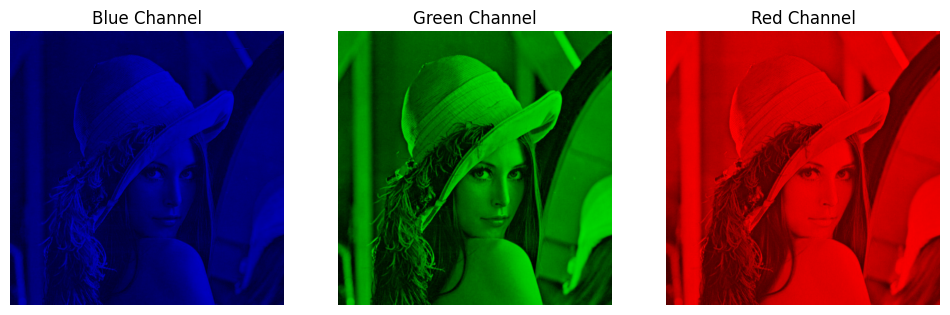

In [7]:
b = image[:, :, 0]
g = image[:, :, 1]
r = image[:, :, 2]
# Create color images for visualization
blue_img = np.zeros_like(image)
blue_img[:, :, 0] = b

green_img = np.zeros_like(image)
green_img[:, :, 1] = g

red_img = np.zeros_like(image)
red_img[:, :, 2] = r

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
# plt.imshow(b,cmap="gray")
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
plt.title('Red Channel')
plt.axis('off')

Smooth Kernel Applied

In [8]:
def smooth_image(image):
    b_channel ,g_channel ,r_channel = cv2.split(image)
    smooth_convolved_b = convolve(b_channel, smoothing_kernel)
    smooth_convolved_g = convolve(g_channel, smoothing_kernel)
    smooth_convolved_r = convolve(r_channel, smoothing_kernel)
    smooth_convolved_image = cv2.merge((smooth_convolved_b, smooth_convolved_g, smooth_convolved_r))
    normalized_result = cv2.normalize(smooth_convolved_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    cv2.imshow('Convolved Image', normalized_result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

smooth_image(image)


Individual Convolved Channel

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

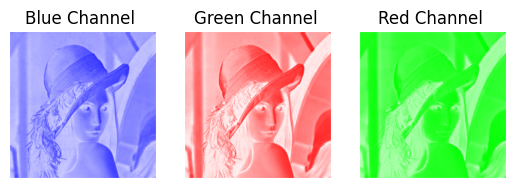

In [9]:
b_channel_convolved = convolve(b, smoothing_kernel)
blue_img = np.zeros_like(image)
blue_img[:, :, 0] =255
blue_img[:,:,1] = 255 - b_channel_convolved 
blue_img[:,:,2] = 255 - b_channel_convolved 

r_channel_convoled = convolve(r,smoothing_kernel)
red_channel = np.zeros_like(image)
red_channel[:,:,1] = 255
red_channel[:,:,0] = 255 - r_channel_convoled
red_channel[:,:,2] = 255 - r_channel_convoled

g_channel_convoled = convolve(g, smoothing_kernel)
green_channel = np.zeros_like(image)
green_channel[:,:,2] = 255 
green_channel[:,:,1] = 255 - g_channel_convoled 
green_channel[:,:,0] = 255 - g_channel_convoled

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
plt.title('Blue Channel ')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(green_channel, cv2.COLOR_BGR2RGB))
plt.title('Green Channel ')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(red_channel, cv2.COLOR_BGR2RGB))
plt.title('Red Channel ')
plt.axis('off')

Sharp Kernel Applied

In [13]:
def sharp_image(image):
    b_channel ,g_channel ,r_channel = cv2.split(image)
    sharp_convolved_b = convolve(b_channel, sharpening_kernel)
    sharp_convolved_g = convolve(g_channel, sharpening_kernel)
    sharp_convolved_r = convolve(r_channel, sharpening_kernel)
    sharp_convolved_image = cv2.merge((sharp_convolved_b, sharp_convolved_g, sharp_convolved_r))
    normalized_result = cv2.normalize(sharp_convolved_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    cv2.imshow('Convolved Image', normalized_result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
sharp_image(image)

In [11]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
smooth_image(hsv_image)
sharp_image(hsv_image)